In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib

#Customize background and pallete colors 
sns.set_style("darkgrid")


Due to we have curated manually the sulfur cycle, we known which Pfams are involved in certain metabolic Pathways.
Therefore we have generated a file containing the PFAMS and the corresponding KO numbers and the name of the pathway involved, see the [tabular file](https://github.com/eead-csic-compbio/metagenome_Pfam_score/blob/master/Advanced_mode/input_sulfur_data/sulfur_score_kegg_list) provide in [MEBS sofware](https://eead-csic-compbio.github.io/metagenome_Pfam_score/)

# Added -comp option in MEBS
(april 30 2018) 

```bash
perl  mebs.pl -input mats_fasta/ -type metagenomic -fdr 0.0001 -comp > mats.fdr0.0001.tsv 
```

In [3]:
#%%bash 
#sed  -i 's/_metahit.final.contigs.fa.prodigal.faa//g' ../data/mats.fdr0.0001.tsv

In [9]:
#MEBS_mats=pd.read_table("../data/mats.fdr0.0001.tsv", index_col=0, sep="\t")
#MEBS_mats =pd.read_table("../data/allmebs2.2plot.tab", index_col=0, sep="\t")
MEBS_mats =pd.read_table("../data/allmebs2.names.tab", index_col=0, sep="\t")

In [10]:
MEBS_comp=MEBS_mats.drop(['sulfur', 'carbon','oxygen','iron','nitrogen','<sulfur comp>', '<carbon comp>'],axis=1)
MEBS_comp.head()

,sulfur_1,sulfur_2,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_10,...,carbon_3,carbon_4,carbon_5,carbon_6,carbon_7,carbon_8,carbon_9,carbon_10,carbon_12,carbon_13
Sample,,,,,,,,,,,,,,,,,,,,,
C_Autumn_13,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,36.4,75.0,50.0,92.9,66.7,28.6,100.0,37.5,0.0
B_Autumn_13,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,45.5,75.0,50.0,92.9,100.0,28.6,84.6,37.5,0.0
C_Spring_13,100.0,60.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,36.4,100.0,50.0,85.7,100.0,28.6,84.6,37.5,0.0
C_Autumn_12,100.0,80.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,65.0,...,100.0,27.3,100.0,50.0,85.7,66.7,28.6,84.6,37.5,0.0
A_Autumn_13,100.0,70.0,100.0,76.5,75.0,60.0,77.8,100.0,100.0,70.0,...,100.0,45.5,100.0,50.0,92.9,100.0,28.6,92.3,37.5,0.0


In [11]:
MEBS_comp.rename(columns={'sulfur_1': 'Sulfite oxidation',
'sulfur_2':'Thiosulfate oxidation', 
'sulfur_3':'Tetrathionate oxidation', 
'sulfur_4':'Tetrathionate reduction', 
'sulfur_5':'Sulfate reduction DS',
'sulfur_6':'Elemental sulfur reduction', 
'sulfur_7':'Thiosulfate disproportion', 
'sulfur_8':'Carbon disulfide oxidation', 
'sulfur_9':'Alkanesulfonate degradation', 
'sulfur_10':'Sulfate reduction A',
'sulfur_11':'Sulfide oxidation', 
'sulfur_12':'Cysteate oxidation', 
'sulfur_13':'Dimethylsulfone oxidation', 
'sulfur_14':'Sulfoacetate oxidation',
'sulfur_15':'Sulfolactate oxidation', 
'sulfur_16':'DMS oxidation',
'sulfur_17':'DMSP oxidation',
'sulfur_18':'MTP oxidation', 
'sulfur_19':'Suloacetaldehyde oxidation',
'sulfur_20':'Elemental sulfur oxidation',
'sulfur_21':'Elemental sulfur disproportion', 
'sulfur_22':'Methanesulfonate oxidation', 
'sulfur_23':'Taurine oxidation', 
'sulfur_24':'DMS methanogenesis', 
'sulfur_25':'MTP methanogesis', 
'sulfur_26':'Methanethiol methanogenesis', 
'sulfur_27':'Homotaurine degradation', 
'sulfur_28':'SQDG biosynthesis',
'sulfur_29':'Marker genes', 
'carbon_1':'coenzyme B/coenzyme M regeneration I (methanophenazine-dependent)',
'carbon_2': 'Methane oxidation, methanotroph, methane => formaldehyde',
'carbon_3': 'methanogenesis energy conservation', 
'carbon_4': 'Methanogenesis, acetate => methane (M00357)', 
'carbon_5':'Methanogenesis, methylamine/dimethylamine/trimethylamine => methane',
'carbon_6':'Methanogenesis from dimethylsulfide/methanethiol/methlthiolpropanoate => methane',
'carbon_7':'Methanogenesis, CO2 => methane',
'carbon_8':'methanogenesis from acetate reductive acetyl coenzyme A pathway II (autotrophic methanogens)',
'carbon_9':'Methanogenesis, methanol => methane',
'carbon_10':'methylamine degradation',
'carbon_12':'methyl-coenzyme M oxidation to CO2',
'carbon_13':'methyl-coenzyme M reduction to methane' },inplace=True)

In [14]:
MEBS_comp=MEBS_comp.T

In [15]:
#sortedcolumns = ['S1', 'S4', 'S7', 'S10',
#                 'S2','S5','S8','S11',
#                 'S3','S6','S9','S12']
#MEBS_comp=MEBS_comp[sortedcolumns]

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


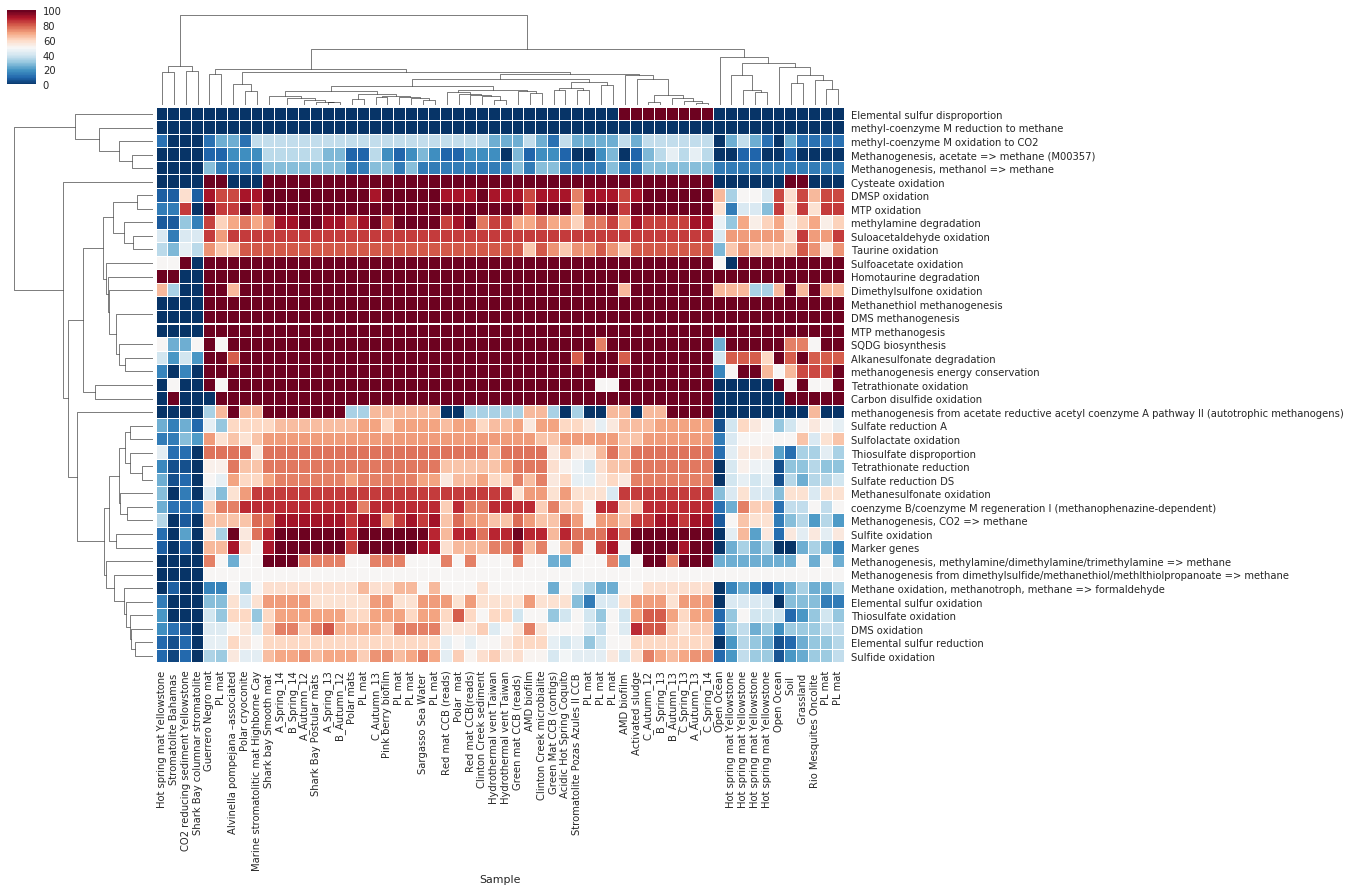

In [16]:
sns.set(font_scale=1)
axs = sns.clustermap(MEBS_comp, col_cluster=True, linewidths=0.01,cmap=sns.color_palette("RdBu_r", 100),
                     figsize=(15,12))
plt.tight_layout()
plt.savefig("../figures/completenessall.png", bbox_inches='tight', dpi=500)